# Unsupervised Machine Learning
## TASK - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [1]:
### Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
### Loading IRIS dataset

df=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
### Dropping unnecessary columns

df2=df.drop(['Id','Species'],axis=1)
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Exploratory Data Analysis

In [4]:
df2.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [5]:
df2.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#### SInce in the dataset the variables are in equal terms, so Scaling is not requied. 

### Finding Optimum number of Clusters

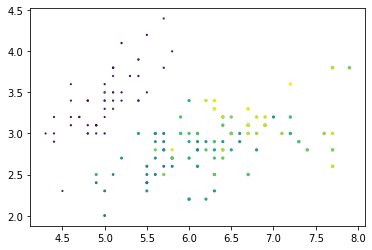

In [7]:
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm,df2.PetalLengthCm,df2.PetalWidthCm)

In [8]:
### Mentioning the range of clusters and SSE stores Sum of Squared Errors

K_range=range(1,10)
SSE=[]

for k in K_range:
    KMS=KMeans(n_clusters=k)
    KMS=KMS.fit(df2)
    SSE.append(KMS.inertia_)

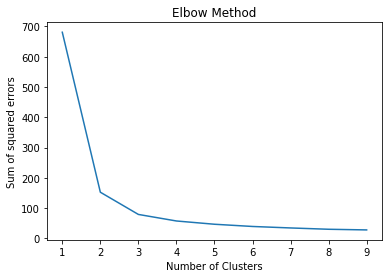

In [9]:
### Graphical Presentation

plt.plot(K_range, SSE)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared errors') 
plt.show()

####  The Elbow Method shown on the above graph. The optimum number of clusters is where the elbow occurs. Here the Sum of Squares Errors (SSE) do not decrease significantly with every iteration. From this we choose the number of clusters as 3.

### Creating K-Means Classifier

In [10]:
kmeans=KMeans(n_clusters = 3)
y_pred=kmeans.fit_predict(df2)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
df2['cluster']=y_pred
data=df2[df2.cluster==0]
data1=df2[df2.cluster==1]
data2=df2[df2.cluster==2]

In [12]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
55,5.7,2.8,4.5,1.3,0


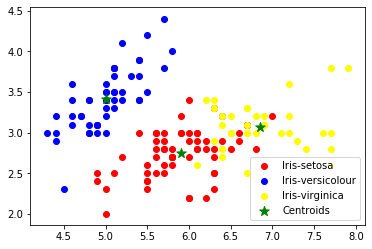

In [13]:
### Scatter plot for First two columns

plt.scatter(data.SepalLengthCm, data.SepalWidthCm, color = 'red', label = 'Iris-setosa')
plt.scatter(data1.SepalLengthCm, data1.SepalWidthCm, color = 'blue', label = 'Iris-versicolour')
plt.scatter(data2.SepalLengthCm, data2.SepalWidthCm, color = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, color = 'green', marker='*', label='Centroids')

plt.legend()

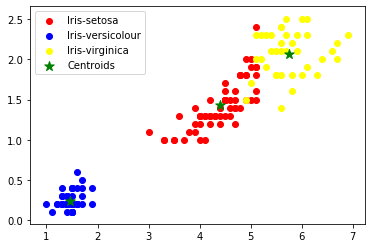

In [14]:
### Scatter plot for Last two columns

plt.scatter(data.PetalLengthCm, data.PetalWidthCm, color = 'red', label = 'Iris-setosa')
plt.scatter(data1.PetalLengthCm, data1.PetalWidthCm, color = 'blue', label = 'Iris-versicolour')
plt.scatter(data2.PetalLengthCm, data2.PetalWidthCm, color = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s=100, color = 'green', marker='*', label='Centroids')

plt.legend()